<a href="https://colab.research.google.com/github/sudeepds/mini-projects/blob/main/CNN_Dog_or_Cat_Classification_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Dog or Cat Classification using Keras
https://www.kaggle.com/code/uysimty/keras-cnn-dog-or-cat-classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## Imports

import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
import os
from zipfile import ZipFile
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [3]:
# Constants 
FAST_RUN = True
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

### Extracting and determining category for Train Folder

In [4]:

def extract(path): 
  # specifying the zip file name
  #file_name = "../content/drive/MyDrive/Datasets/CNNDogOrCatClassification/train (1).zip"
  file_name = path
    
  # opening the zip file in READ mode
  with ZipFile(file_name, 'r') as zip:
      # printing all the contents of the zip file
      zip.printdir()
    
      # extracting all the files
    # print('Extracting all the files now...')
      zip.extractall()
      print('Done!')

In [5]:
def categorize(extractedPath):
  filenames = os.listdir(extractedPath)
  categories = []
  for filename in filenames:
      category = filename.split('.')[0]
      if category == 'dog':
          categories.append(1)
      else:
          categories.append(0)

  df = pd.DataFrame({
      'filename': filenames,
      'category': categories
  })
  return df, filenames

In [6]:
extract("../content/drive/MyDrive/Datasets/CNNDogOrCatClassification/train (1).zip")

df, filenames = categorize("/content/train")


Streaming output truncated to the last 5000 lines.
train/dog.55.jpg                               2013-09-20 10:02:54        63050
train/dog.550.jpg                              2013-09-20 10:02:54         4826
train/dog.5500.jpg                             2013-09-20 10:02:54        44699
train/dog.5501.jpg                             2013-09-20 10:02:54        30379
train/dog.5502.jpg                             2013-09-20 10:02:54        25140
train/dog.5503.jpg                             2013-09-20 10:02:54        21938
train/dog.5504.jpg                             2013-09-20 10:02:54         7717
train/dog.5505.jpg                             2013-09-20 10:02:54        26625
train/dog.5506.jpg                             2013-09-20 10:02:54         8554
train/dog.5507.jpg                             2013-09-20 10:02:54        19899
train/dog.5508.jpg                             2013-09-20 10:02:54         9154
train/dog.5509.jpg                             2013-09-20 10:02:54   

In [7]:
df.head()

filename  category
0   cat.8368.jpg         0
1  cat.10862.jpg         0
2   dog.2147.jpg         1
3   cat.3364.jpg         0
4     dog.45.jpg         1

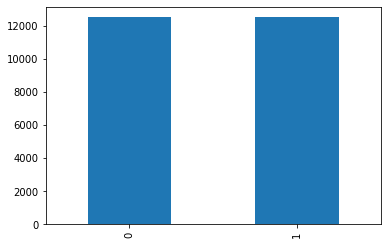

In [8]:
df['category'].value_counts().plot.bar()

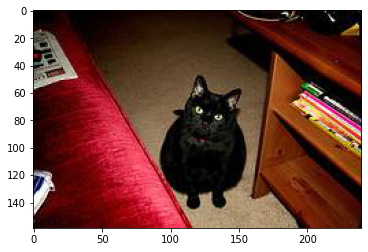

In [9]:
## See a sample image
sample = random.choice(filenames)
image = load_img("/content/train/"+sample)
plt.imshow(image)

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [11]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 64)       2

### Callbacks



In [12]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

#### Early Stopping

To avoid overfitting, terminating the execution after 10 epochs of no improvement

In [13]:
earlystop = EarlyStopping(patience=10)

#### Learning Rate Reduction

Reducing the learning rate when accuracy doesn't increase for 2 consecutive steps.

In [14]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.2, min_lr=0.00001)

In [15]:
callbacks = [earlystop, learning_rate_reduction]

### Data Preparation

Converting 1 to dog and 0 to cat as we would be using image generator class with class_mode='categorical'

In [16]:
df['category'] = df['category'].replace({0: 'cat', 1:'dog'})

In [17]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [18]:
train_df.head(5)

filename category
0   cat.1791.jpg      cat
1  dog.11725.jpg      dog
2  cat.11323.jpg      cat
3   dog.6220.jpg      dog
4   cat.9577.jpg      cat

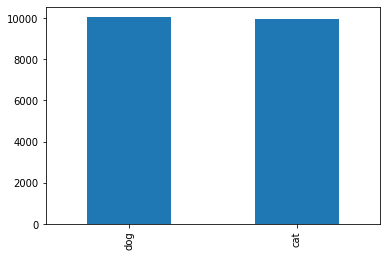

In [19]:
train_df['category'].value_counts().plot.bar()

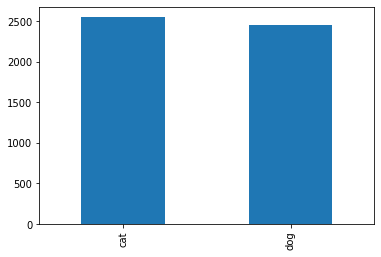

In [20]:
validate_df['category'].value_counts().plot.bar()

In [21]:
train_df.shape

(20000, 2)

## Image Augmentation

It is a technique to changing the frame of an image by rotating, zooming flipping, shifting and changing the brighness. This creates a corpus of slightly different images without changing the category. It is a good way to improve the training data.

We will use Keras's ImageDataGenerator class which performs Image Augmentation on the fly without loading all the images at a time in the memory.
We will do it for both training and validation dataset.

Training Dataset Augmentation

In [22]:
train_datagen = ImageDataGenerator(rotation_range=15, rescale=1./255, shear_range=0.1, zoom_range=0.2, horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)

In [23]:
train_generator = train_datagen.flow_from_dataframe(train_df, "/content/train", x_col='filename', y_col='category', target_size=IMAGE_SIZE, class_mode='categorical', batch_size=15)

Found 20000 validated image filenames belonging to 2 classes.


Validation Dataset Augmentation

In [24]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
validation_generator = validation_datagen.flow_from_dataframe(validate_df, "/content/train", x_col='filename', y_col='category', target_size=IMAGE_SIZE, class_mode='categorical', batch_size=15)

Found 5000 validated image filenames belonging to 2 classes.


### Checking the Generator

In [26]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/content/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


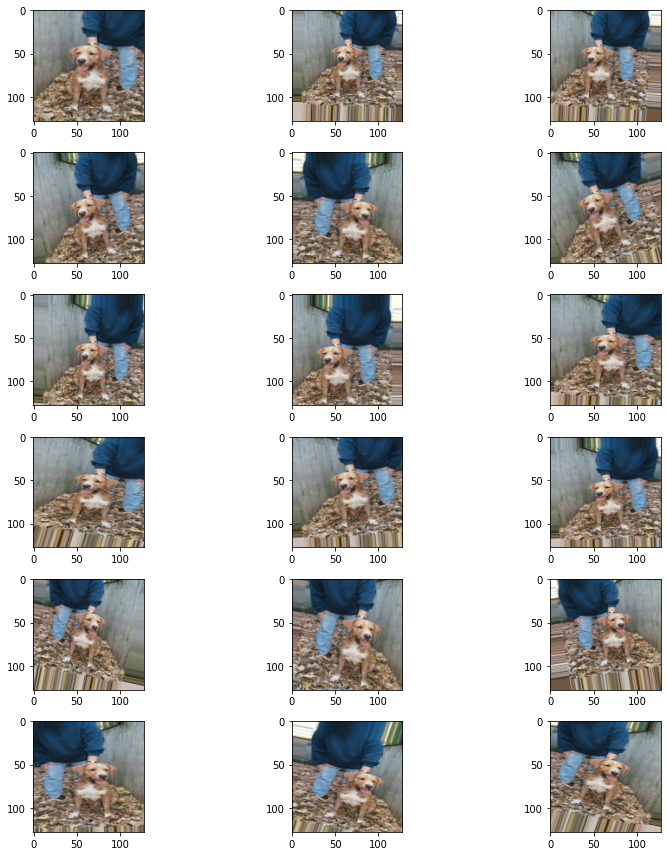

In [27]:
plt.figure(figsize=(12, 12))
for i in range(0, 18):
  plt.subplot(6, 3, i+1)
  for X_batch, Y_batch in example_generator:
    image=X_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

## Model Fit

In [28]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [29]:
batch_size=15
epochs = 5 if FAST_RUN else 50
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator, validation_steps=total_validate//batch_size, steps_per_epoch=total_train//batch_size, callbacks=callbacks)

Epoch 1/5
1333/1333 [==============================] - 158s 108ms/step - loss: 0.7576 - accuracy: 0.6259 - val_loss: 0.6000 - val_accuracy: 0.7175 - lr: 0.0010
Epoch 2/5
1333/1333 [==============================] - 143s 107ms/step - loss: 0.5759 - accuracy: 0.7033 - val_loss: 0.5620 - val_accuracy: 0.7141 - lr: 0.0010
Epoch 3/5
1333/1333 [==============================] - 140s 105ms/step - loss: 0.5254 - accuracy: 0.7418 - val_loss: 0.5214 - val_accuracy: 0.7526 - lr: 0.0010
Epoch 4/5
1333/1333 [==============================] - 139s 105ms/step - loss: 0.4784 - accuracy: 0.7773 - val_loss: 0.8664 - val_accuracy: 0.6599 - lr: 0.0010
Epoch 5/5
1333/1333 [==============================] - 140s 105ms/step - loss: 0.4396 - accuracy: 0.7969 - val_loss: 0.3695 - val_accuracy: 0.8364 - lr: 0.0010


### Saving Model

In [30]:
model.save_weights("model.h5")

## Visualizing Training

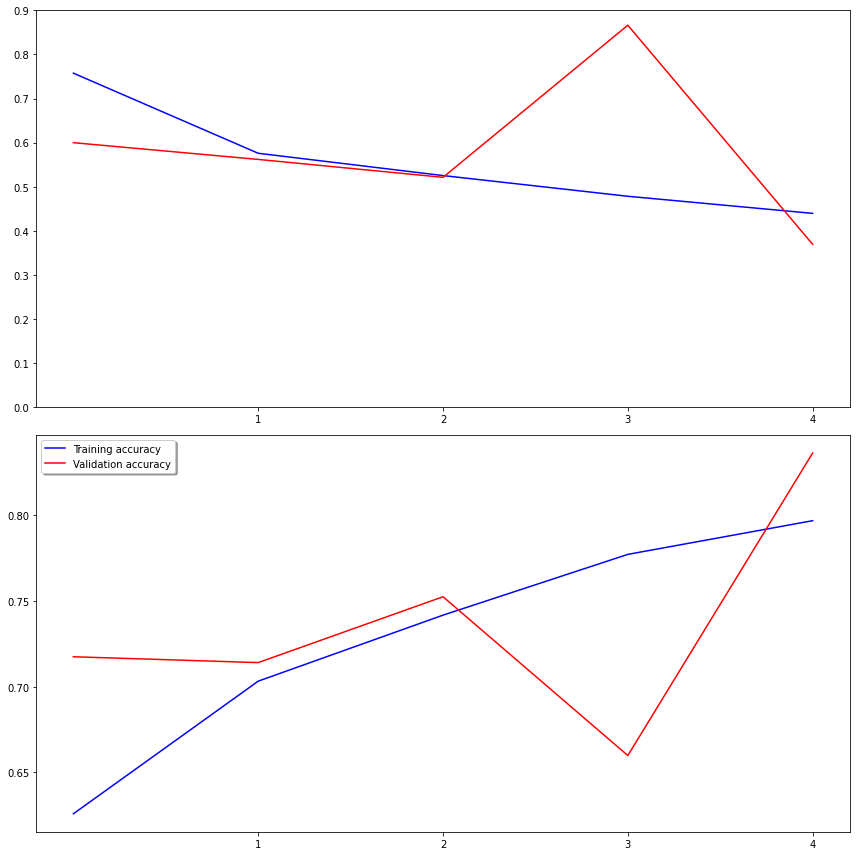

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

## Preparing Testing Data

In [32]:
extract("/content/drive/MyDrive/Datasets/CNNDogOrCatClassification/test1.zip")

Streaming output truncated to the last 5000 lines.
test1/55.jpg                                   2013-09-20 10:12:24        22857
test1/550.jpg                                  2013-09-20 10:12:40        11253
test1/5500.jpg                                 2013-09-20 10:15:26        19488
test1/5501.jpg                                 2013-09-20 10:15:26        14965
test1/5502.jpg                                 2013-09-20 10:15:26        14406
test1/5503.jpg                                 2013-09-20 10:15:26        14957
test1/5504.jpg                                 2013-09-20 10:15:26        15065
test1/5505.jpg                                 2013-09-20 10:15:26         2985
test1/5506.jpg                                 2013-09-20 10:15:26         4349
test1/5507.jpg                                 2013-09-20 10:15:26        27502
test1/5508.jpg                                 2013-09-20 10:15:26        54253
test1/5509.jpg                                 2013-09-20 10:15:26   

In [33]:
test_filenames = os.listdir("/content/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

## Creating Test Generator

In [34]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


## Predict

In [35]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


As its a categorical classification, the predict will have probability for each category. We can take the max of these probabilities and assign the class.

In [36]:
test_df['category'] = np.argmax(predict, axis=-1)

In [37]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [38]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

## Visualize the Result

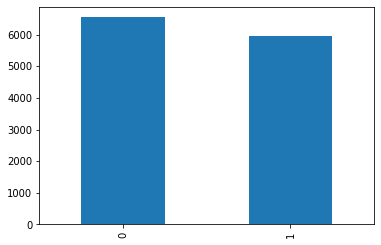

In [39]:
test_df['category'].value_counts().plot.bar()

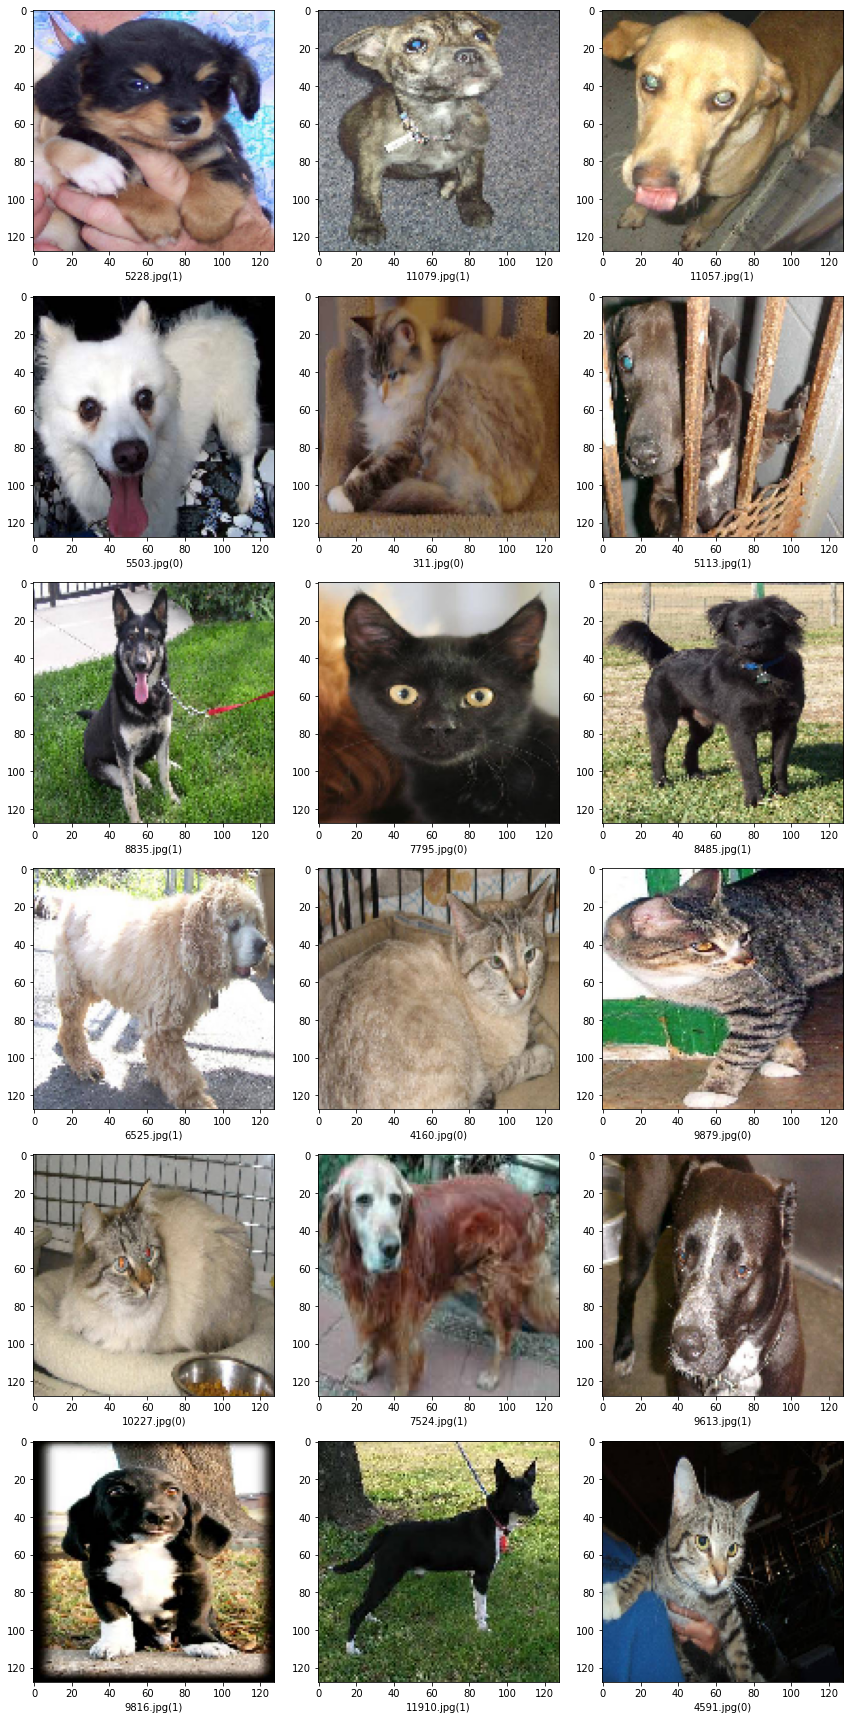

In [40]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

Steps Involved

## Data Preparation

*   Unzip the folder.
*   Assign labels based on the file name. If name has 'dog' then 1 if 'cat' then 0 and finally prepare a dataframe.
*   Plot a bar chart.
*   Use 'load_img' class to see a sample image.

## Building Model

*   We will have three convolutional layers with incremental filter size. First convolutional layer which is also the input layer. We will define the input size with width, height and number of channels. Number of channels will be 3(RGB) in this case, the available images are color.
*   After every convolutional layer, we will have a Normalization layer followed by pooling layer and dropout. Pooling layers are the one which takes in a matrix size which gets pooled OR we can say that this matrix gets represented by a single value. If we use Max pooling then the maximum value out of all the elements in the matrix and further used as a representative element. If Average pooling used then, it uses the average of all the elements.
Drop out layer randomly drops the given fraction of connections in each iteration. It is used to avoid overfitting.
*   After the three convolutional layer we will have a fully connected layer which will have a Falattened input then followed by a Dense layer, a normalization layer and a dropout layer. The last sublayer would have a two neurons and a softmax activation function. Two neurons because we have only two possible categories cat and dog.
*   Finally compile the model with loss as "categorical_crossentropy" and optimizer as 'rms prop'. Metrics we can use as accuracy as its a classification task.

## Callbacks
* One important element we will use is a set of Callbacks. Callbacks are actions performed at some stage (eg. end of an epoch) of training. 
* We will use two callbacks, EarlyStopping and ReduceLRIOnPlateau. These need to be defined individually and then added into an array and ultimatelty passed to the model.fit as param.

## Prepare Data

*  This stage includes splitting training and validation data, image augmentation etc.
*  We will use sklearn's train_test_split class for splitting into training and validation sets.
* Image Augmentation: It is a technique to changing the frame of an image by rotating, zooming flipping, shifting and changing the brighness. This creates a corpus of slightly different images without changing the category. It is a good way to improve the training data. 
We will use Keras's ImageDataGenerator class which performs Image Augmentation on the fly without loading all the images at a time in the memory.
We will do it for both training and validation dataset separately.

## Fit Model
* We will fit the model using model.fit method. Here we will pass the callbacks array as well.

## Prepare Testing Data
* Here we will prepare the testing data in the same manner we prepared test and validation data.
* We will extract the zip folder and then prepare a dataframe by going through directory list.
* Once we have the folder unzipped, we will use the ImageDataGenerator class to get a generator(image augmentaion) and then finally use flow_from_dataframe class to get the generator for test images.

## Predict

* We will apply model.predict_generator on the test generator from previous step.

